I'm Yoginii Waykole, a third-year AIML enthusiast driven by a passion for innovation and problem-solving. With a good foundation in Python and machine learning algorithms, I'm eager to apply my skills in real-world scenarios. I believe in the power of AI to transform lives, and I'm excited about the opportunity to contribute meaningfully to your team, pushing the boundaries of what's possible in the realm of AI and ML.

#Understanding the dataset

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#Reading the dataset
df = pd.read_csv("/content/training.csv")
df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [3]:
# Printing the first 5 columns of the dataset
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [4]:
# Printing the last 5 columns of the dataset
df.tail()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04
550175,NTM1,X1,A3,DIRECT,Small,Powder,Nov-20,139.42


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [6]:
df.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [7]:
df.isna().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [8]:
df['Month of Sourcing'] = pd.to_datetime(df['Month of Sourcing'], format='%b-%y')
df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.04


#Exploratory Data Analysis

1. Time Series Plot

In the time series plot of sourcing cost, the data reveals a notable trend: sourcing costs peaked in March 2021, marking the highest point in the observed period. Conversely, September 2020 recorded the lowest sourcing cost, indicating a dip in expenditures during that time. This visual analysis highlights fluctuations in sourcing expenses over time, with March 2021 standing out as a period of notably higher costs compared to other months.

<Figure size 640x480 with 0 Axes>

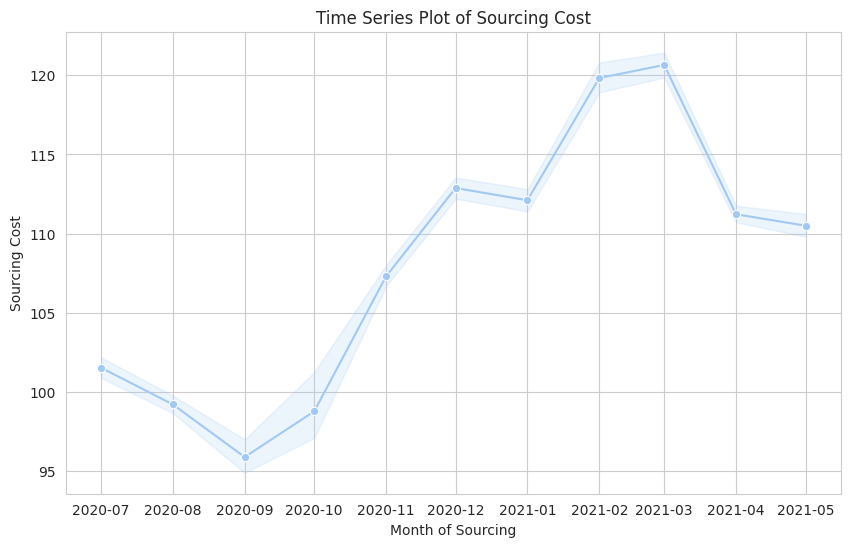

In [9]:
sns.set_style("whitegrid")
sns.despine()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', data=df, marker='o', color=sns.color_palette("pastel")[0])
plt.title('Time Series Plot of Sourcing Cost')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.grid(True)  # Add grid
plt.show()


2. Seasonal Decomposition Plot

The seasonal decomposition plot reveals several key insights about the Sourcing Cost time series data. In the observed plot, the Sourcing Cost exhibits significant fluctuations, with occasional spikes surpassing 30,000 and 430,000 units. The trend plot illustrates a general increasing trend over time, particularly evident around the 200,000 and 430,000 unit marks, indicating a consistent upward trajectory in Sourcing Cost. However, no clear seasonal pattern is observed in the data, as indicated by the absence of distinct seasonal variations in the seasonal plot. Nevertheless, the decomposition successfully captures the underlying patterns, as evidenced by the residual plot closely resembling the original data, with little residual variation remaining.

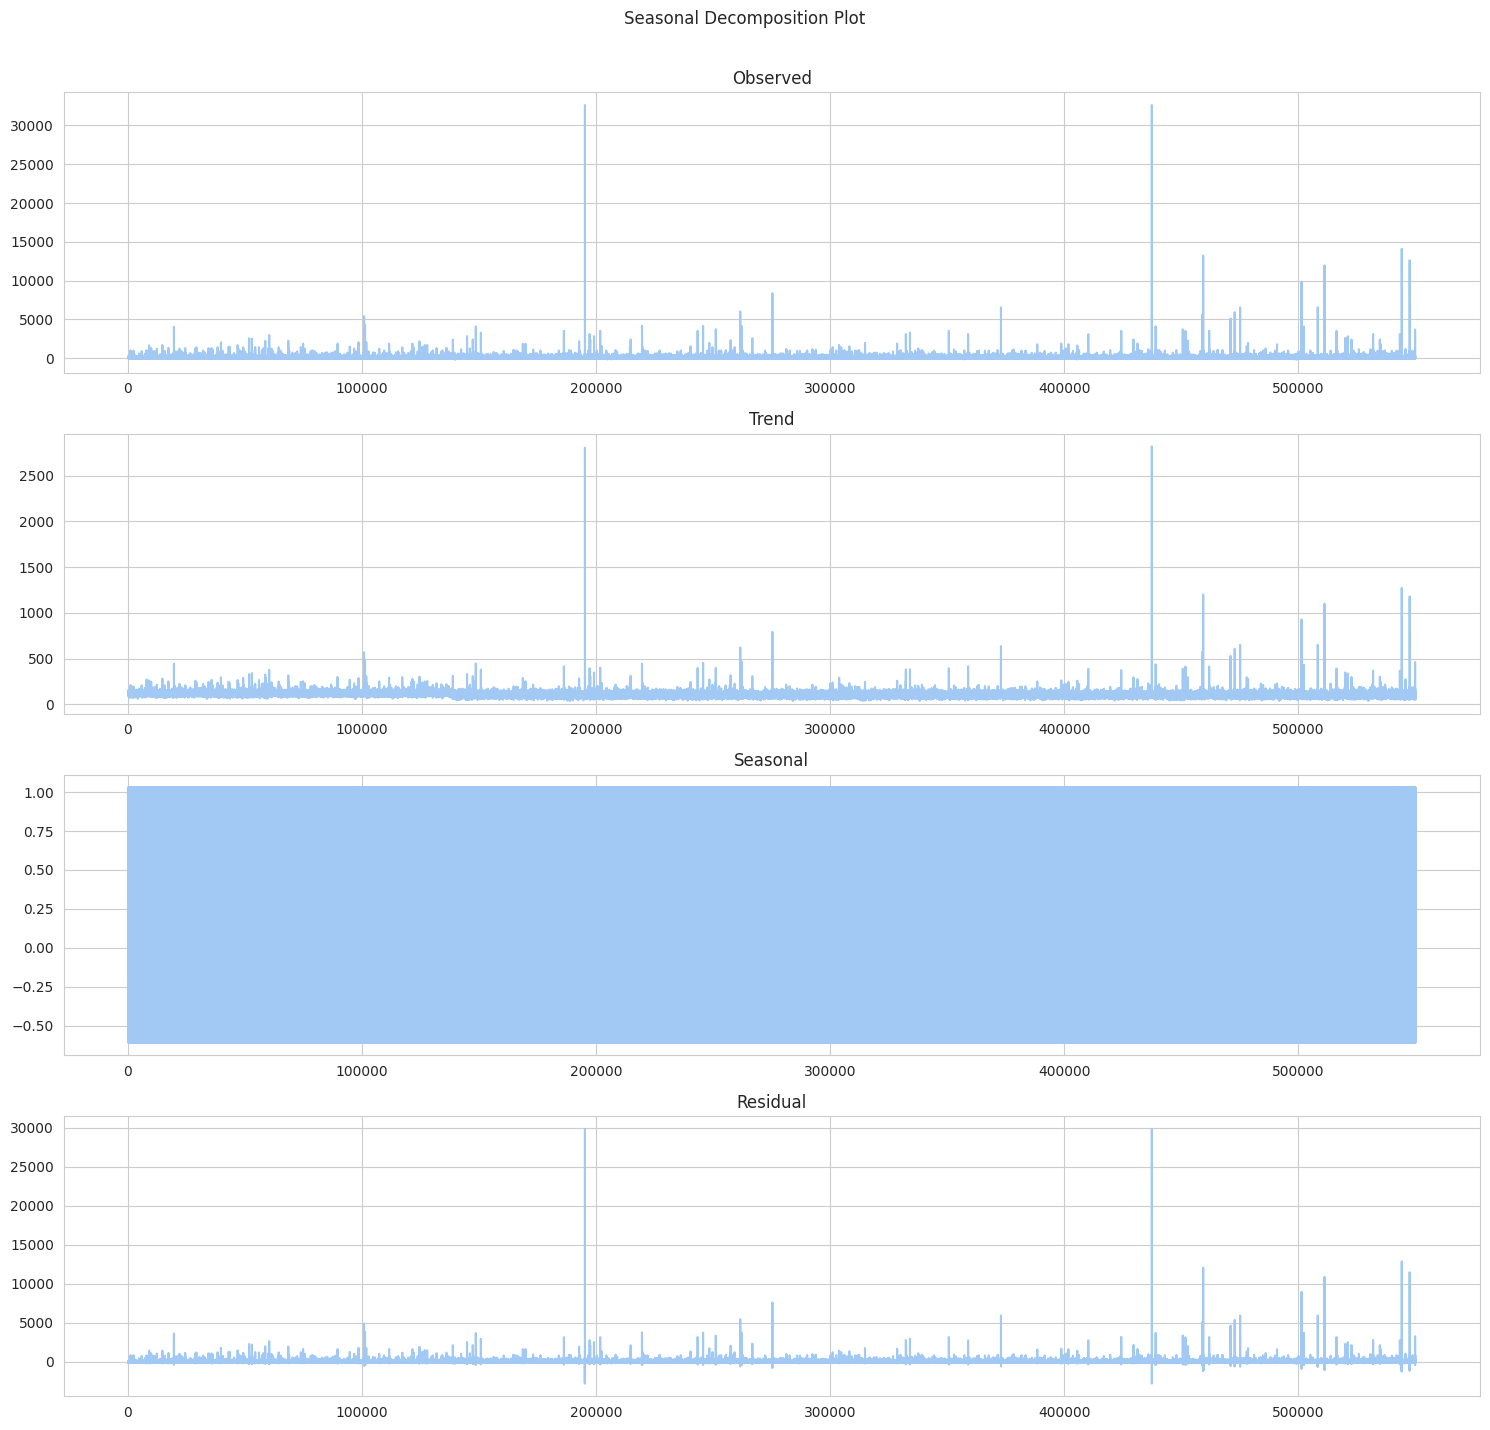

In [10]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot seasonal decomposition
plt.figure(figsize=(15, 15))
decomposition = seasonal_decompose(df['Sourcing Cost'], model='additive', period=12)

# Plot decomposition components
plt.subplot(4, 1, 1)
decomposition.observed.plot()
plt.title('Observed')

plt.subplot(4, 1, 2)
decomposition.trend.plot()
plt.title('Trend')

plt.subplot(4, 1, 3)
decomposition.seasonal.plot()
plt.title('Seasonal')

plt.subplot(4, 1, 4)
decomposition.resid.plot()
plt.title('Residual')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Seasonal Decomposition Plot')

# Show plot
plt.show()

3. Autocorrelation Function (ACF) Plot

The Autocorrelation Function (ACF) plot displays the correlation between a time series and its lagged versions. The first point at 1.00 represents perfect correlation with itself at lag 0. Subsequent points, spanning lags 1 to 40, indicate the strength and direction of correlation at each lag. Peaks or troughs above or below the dashed lines (usually at 0.05 significance level) suggest statistically significant autocorrelation at those lags. This plot aids in identifying temporal dependencies and determining suitable parameters for time series models.

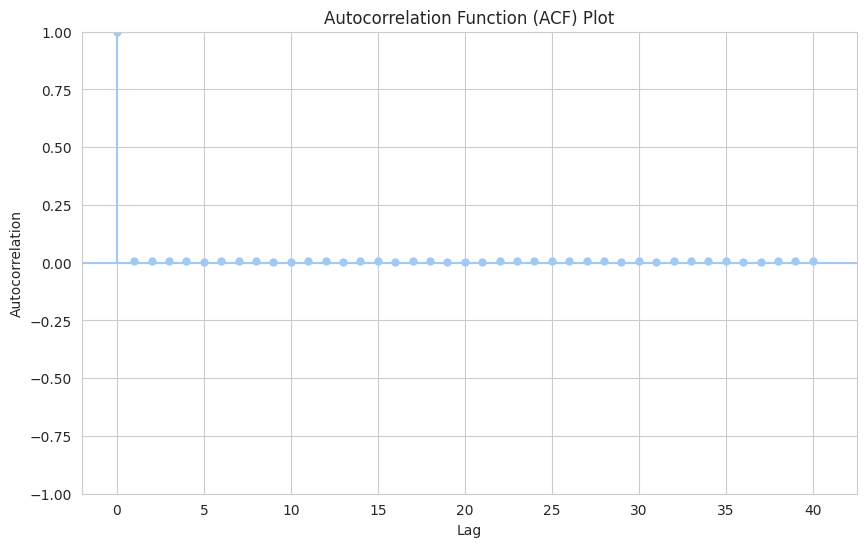

In [11]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
plot_acf(df['Sourcing Cost'], lags=40, alpha=0.05, ax=plt.gca())

plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.show()

4. Seasonality of Sourcing Cost by Product Type

In the seasonality plot of sourcing cost by product type, the data reveals distinct patterns for different product types over time. For NTM3, sourcing costs remain relatively lower, fluctuating between below 60 and slightly above 100, with the highest values observed in March 2021. Conversely, NTM2 and NTM1 exhibit higher sourcing costs consistently above 100. NTM1 reaches its peak in February 2021, while NTM2 peaks in January 2021. These observations suggest variations in sourcing costs among product types and highlight specific months where each product type experiences maximum sourcing expenses.

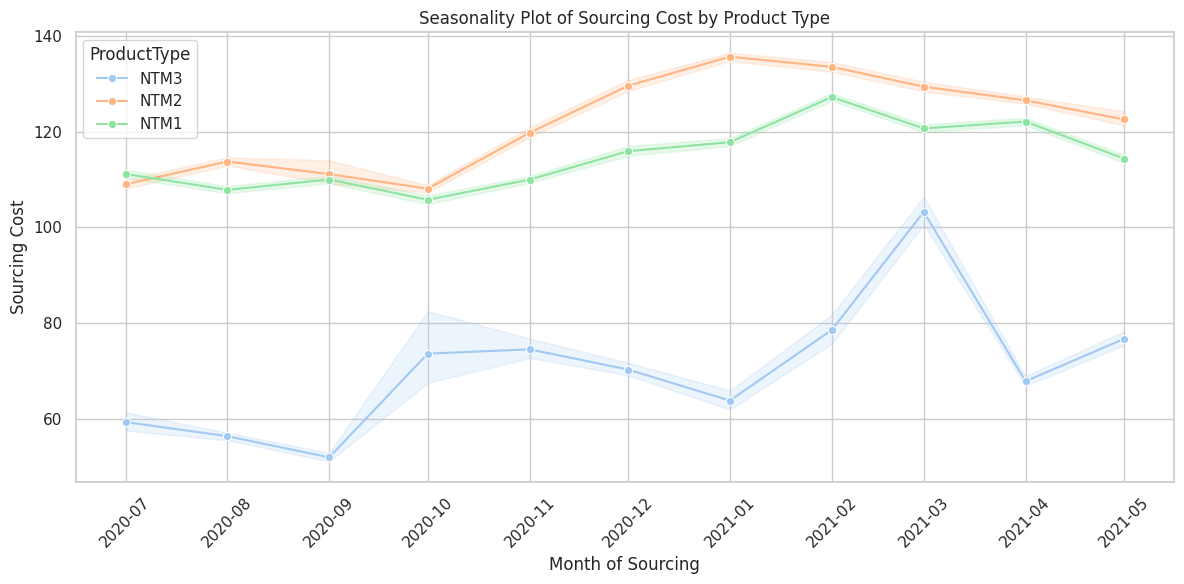

In [12]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', data=df, hue='ProductType', marker='o')
plt.title('Seasonality Plot of Sourcing Cost by Product Type')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Distribution of Sourcing Cost by Manufacturer

In the distribution of sourcing cost by manufacturer plot, distinct patterns emerge across manufacturers. Manufacturer X1 exhibits a wider range of sourcing costs, with values reaching above 30000, notably marked as outliers. Prior to these outliers, the bulk of the data lies around 15000. Manufacturer X2, on the other hand, displays a narrower range, with no values surpassing 5000, indicating lower sourcing costs overall. Manufacturer X3 shows a consistent distribution clustered at lower values, without any outliers or values exceeding 15000, highlighting comparatively lower sourcing costs across all observations.

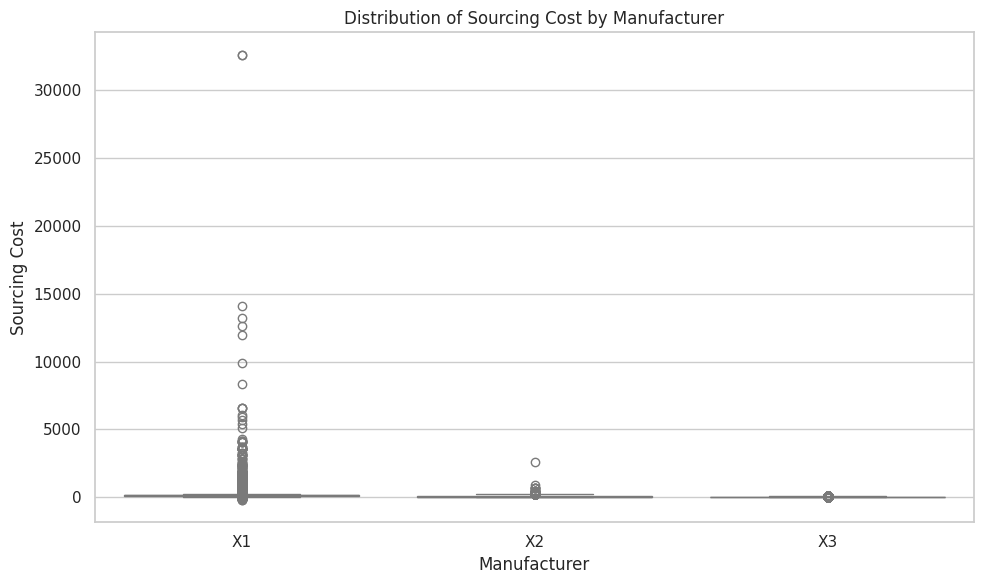

In [13]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Manufacturer', y='Sourcing Cost', data=df)
plt.title('Distribution of Sourcing Cost by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Sourcing Cost')
plt.tight_layout()
plt.show()

6. Sourcing Channel Count Plot

In the Sourcing Channel Count Plot, we observe that the direct sourcing channel has the highest count, surpassing 400,000, indicating its predominant usage. Retail follows with a count greater than 100,000, while the e-commerce channel shows a similar trend. However, the wholesale channel records the lowest count, indicating comparatively less utilization. The hierarchy in channel usage appears as: Direct > Retail > E-commerce > Wholesale, suggesting varying levels of preference or accessibility among sourcing channels.

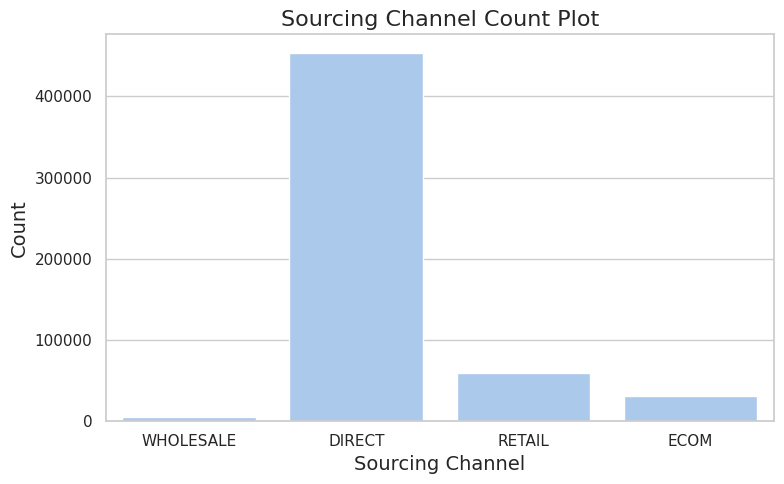

In [14]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 5))
sns.countplot(x='Sourcing Channel', data=df)

plt.title('Sourcing Channel Count Plot', fontsize=16)
plt.xlabel('Sourcing Channel', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()

plt.show()

7. Relationship between Product Size and Sourcing Cost

In the Relationship between Product Size and Sourcing Cost plot, notable patterns emerge regarding the distribution of sourcing costs across different product sizes. The "Extra Large" category exhibits an outlier with a sourcing cost exceeding 30000, indicating a significant deviation from the typical range of costs. Conversely, the "Small" category also displays an outlier around 15000. However, the bulk of observations for "Small" and other categories fall within a lower range, with costs generally below 5000. The "Large" category shows a broader distribution, with costs extending up to 15000. This visualization highlights variations in sourcing costs across different product sizes, with outliers indicating potential anomalies or exceptional cases within each category.

<ipython-input-15-ba9a7860f5ec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Size', y='Sourcing Cost', data=df, palette='pastel')


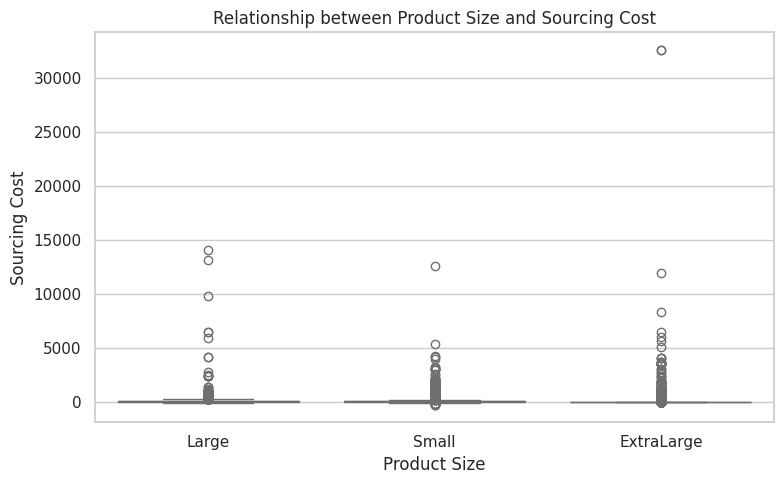

In [15]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 5))
sns.boxplot(x='Product Size', y='Sourcing Cost', data=df, palette='pastel')
plt.title('Relationship between Product Size and Sourcing Cost')
plt.xlabel('Product Size')
plt.ylabel('Sourcing Cost')
plt.tight_layout()
plt.show()

8. Count of Sourcing Channel

<ipython-input-16-e10268a0fc1c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sourcing Channel', data=df, palette='pastel')


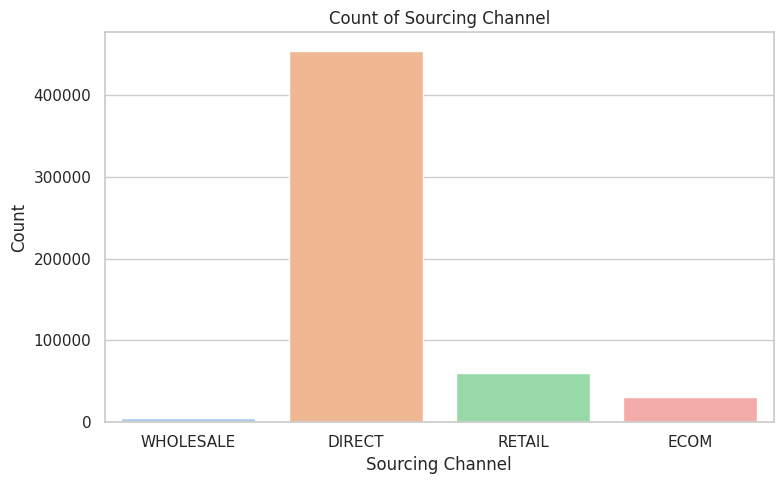

In [16]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 5))
sns.countplot(x='Sourcing Channel', data=df, palette='pastel')
plt.title('Count of Sourcing Channel')
plt.xlabel('Sourcing Channel')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

9.  Sourcing Cost over time for each Product Size

The graph "Sourcing Cost Over Time by Product Size" illustrates distinct trends in sourcing costs across different product sizes over time. For the "Extra Large" category, a peak is observed in October 2020, reaching a maximum spending cost of 600. However, this category also shows considerable fluctuation, with costs occasionally falling below those of the "Large" and "Small" categories. In contrast, both the "Large" and "Small" categories maintain relatively stable costs, consistently below 200, without significant fluctuations throughout the observed period. This visualization highlights variations in sourcing costs across different product sizes, with "Extra Large" displaying more pronounced variability compared to "Large" and "Small" categories.

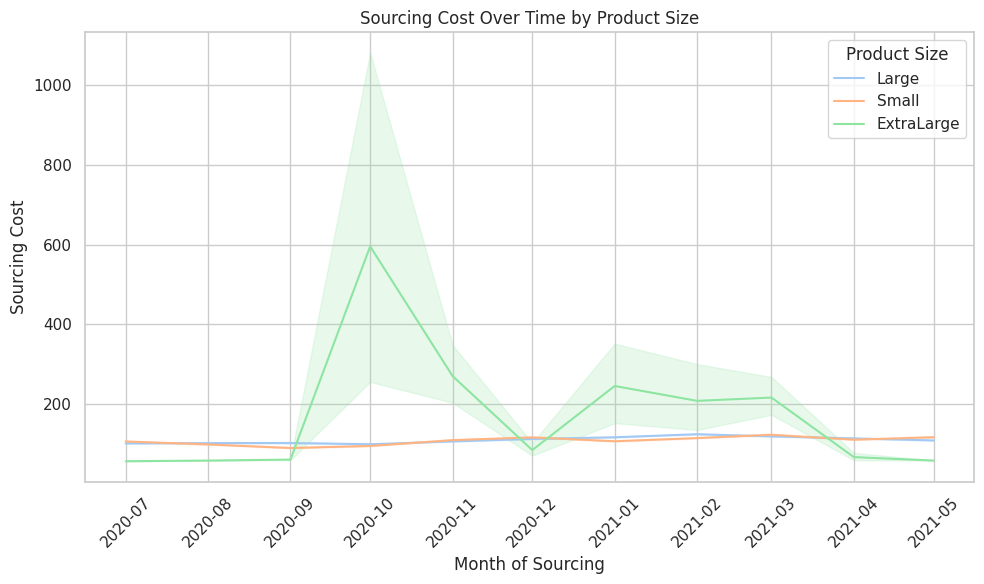

In [17]:
sns.set(style="whitegrid", palette="pastel")

# Plot Sourcing Cost over time by Product Size
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Month of Sourcing", y="Sourcing Cost", hue="Product Size", palette="pastel")
plt.title("Sourcing Cost Over Time by Product Size")
plt.xlabel("Month of Sourcing")
plt.ylabel("Sourcing Cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

10. Counts of different Product Types over time

The plot "Product Types by Month of Sourcing" illustrates the distribution of different product types over time. In November 2020, NTM2 had the highest count, followed by NTM1, with NTM3 having the lowest count. In January 2021, NTM3 reached its highest count, surpassing NTM2 and NTM1. Throughout the observed period, NTM2 consistently maintained the highest count, followed by NTM1 and then NTM3. This visualization provides insights into the variations in sourcing patterns across different product types over time, highlighting the relative popularity of each product type in different months.

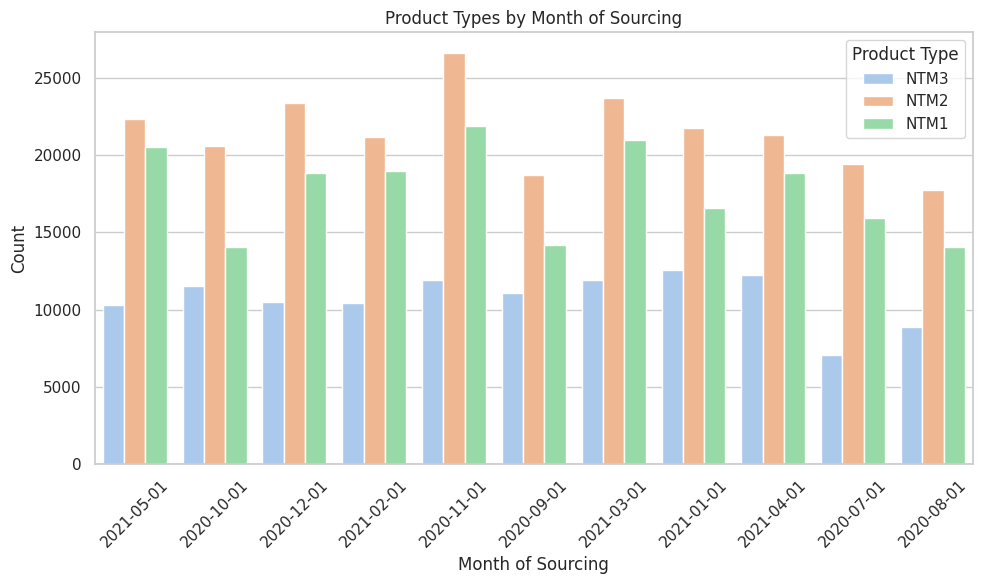

In [18]:
sns.set(style="whitegrid", palette="pastel")

# Plot Product Types by Sourcing Channel over time
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Month of Sourcing", hue="ProductType", palette="pastel")
plt.title("Product Types by Month of Sourcing")
plt.xlabel("Month of Sourcing")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Product Type")
plt.tight_layout()
plt.show()

11. Sourcing Cost by Manufacturer and Sourcing Channel

The strip plot "Sourcing Cost by Manufacturer and Sourcing Channel" visualizes the distribution of sourcing costs across different manufacturers and sourcing channels. Manufacturer X1 is associated with all four sourcing channels, indicating a broader range of sourcing options. In contrast, Manufacturer X2 has sourcing channels limited to direct and retail only, suggesting a narrower sourcing scope. Manufacturer X3 exclusively utilizes the retail channel for sourcing, demonstrating a specialized approach compared to X1 and X2. This visualization offers insights into the sourcing strategies of different manufacturers and their channel preferences.

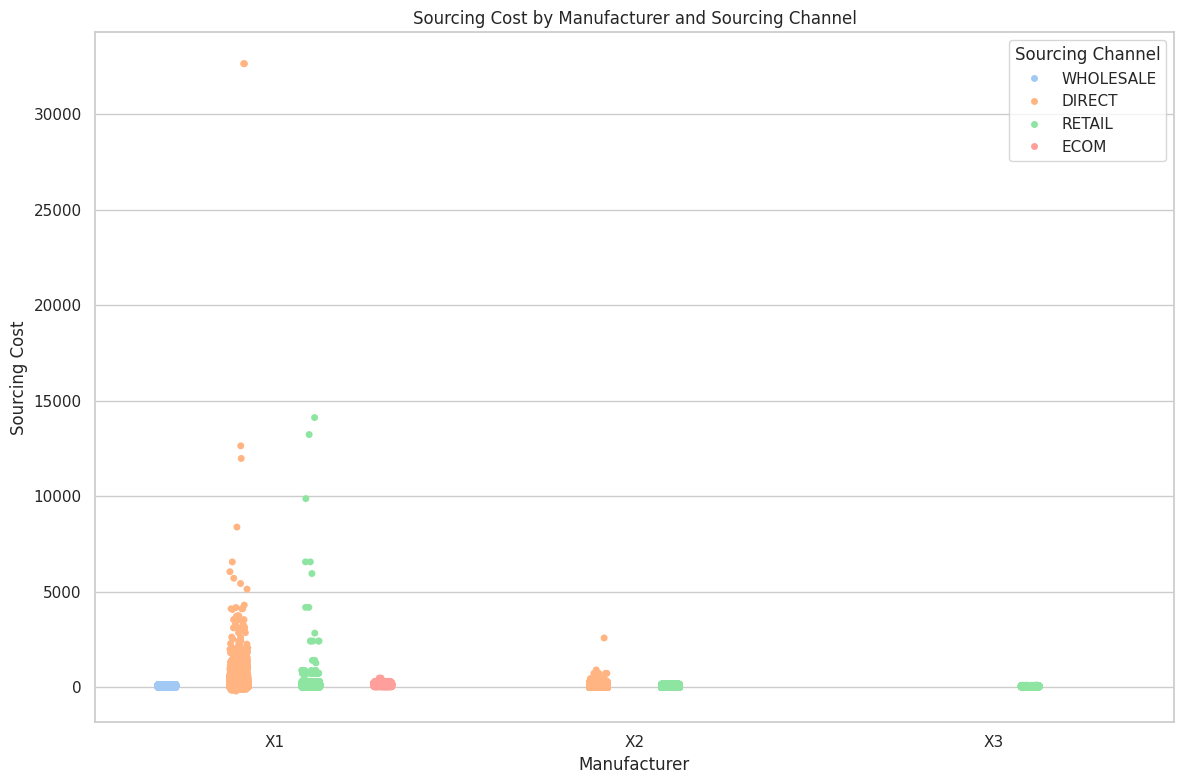

In [19]:
sns.set(style="whitegrid", palette="pastel")

# Plot strip plot of Sourcing Cost by Manufacturer and Sourcing Channel
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x="Manufacturer", y="Sourcing Cost", hue="Sourcing Channel", palette="pastel", dodge=True)
plt.title("Sourcing Cost by Manufacturer and Sourcing Channel")
plt.xlabel("Manufacturer")
plt.ylabel("Sourcing Cost")
plt.legend(title="Sourcing Channel")
plt.tight_layout()
plt.show()


12. Frequency of each type of product

The count plot "Distribution of Product Type" visualizes the frequency distribution of different product types within the dataset. It reveals that the "Powder" product type has the highest count among all product types, indicating its prevalence or popularity compared to other types. This visualization provides a clear understanding of the distribution of product types in the dataset, highlighting the dominance of the "Powder" category.

<ipython-input-20-dfd4c46087ad>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Product Type", palette="pastel")


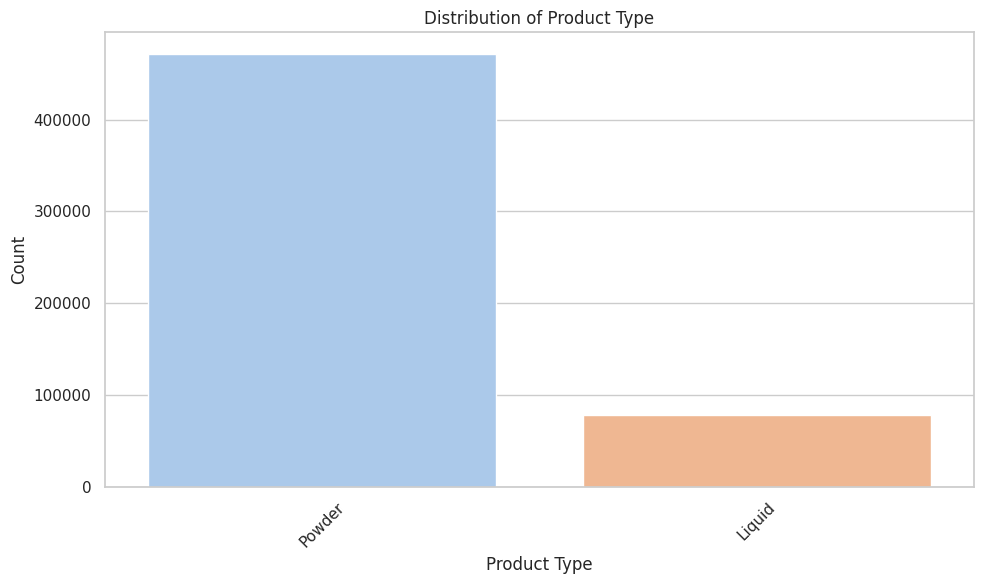

In [20]:
# Set Seaborn style and palette
sns.set(style="whitegrid", palette="pastel")

# Plot countplot of Product Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Product Type", palette="pastel")
plt.title("Distribution of Product Type")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

13.

In a comprehensive analysis of sourcing data, several key insights emerge. Firstly, concerning temporal trends, March 2021 stands out with the highest average sourcing cost, indicating increased expenditure during that period. Conversely, September 2020 records the lowest average sourcing cost, suggesting potential cost-saving measures or reduced demand during that time.

When examining sourcing costs by product size, it becomes apparent that "Extra Large" products exhibit the widest range of costs, with occasional outliers exceeding 30,000 units. In contrast, "Large" and "Small" products maintain relatively stable costs below 200 units, indicating consistent pricing trends within these size categories.

Furthermore, analysis by product type reveals varying patterns over time, with NTM2 consistently having the highest count, followed by NTM1 and then NTM3. This suggests fluctuating popularity among product types, potentially influenced by market demand or product availability.

Moreover, manufacturer sourcing strategies vary significantly. X1 appears to utilize all available channels for sourcing, indicating a diverse sourcing approach. In contrast, X2 is restricted to direct and retail channels, potentially reflecting a targeted sourcing strategy. Lastly, X3 exclusively employs the retail channel, indicating a focused sourcing approach tailored to retail distribution channels.

Overall, these insights provide valuable information for optimizing sourcing strategies, understanding market dynamics, and identifying areas for improvement in procurement processes.

#Model implementation for time series data

##ARIMA

In [21]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the training dataset
train_data = pd.read_csv('/content/training.csv')  # Replace 'path_to_training_dataset.csv' with the actual path

# Convert 'Month of Sourcing' column to datetime
train_data['Month of Sourcing'] = pd.to_datetime(train_data['Month of Sourcing'], format='%b-%y')

# Aggregate data by month
train_data_monthly = train_data.groupby(['Month of Sourcing']).agg({'Sourcing Cost': 'sum'}).reset_index()

# Fit ARIMA model
model = ARIMA(train_data_monthly['Sourcing Cost'], order=(2, 2, 0))  # Example parameters, you can adjust
fit_model = model.fit()

# Load the test dataset
test_data = pd.read_csv('/content/testing.csv')  # Replace 'path_to_test_dataset.csv' with the actual path

# Convert 'Month of Sourcing' column to datetime
test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')

# Forecast June 2021 numbers using the trained ARIMA model
forecast = fit_model.forecast(steps=len(test_data))

# Print the forecasted values for June 2021
print("Forecasted Sourcing Costs for June 2021:")
print(forecast)

Forecasted Sourcing Costs for June 2021:
11     5.880444e+06
12     5.653751e+06
13     5.538316e+06
14     5.428883e+06
15     5.290345e+06
           ...     
102   -5.810644e+06
103   -5.938263e+06
104   -6.065882e+06
105   -6.193500e+06
106   -6.321119e+06
Name: predicted_mean, Length: 96, dtype: float64


In [22]:
# Evaluate forecasted values with actual values from test set
actual_values = test_data['Sourcing Cost']

mse = mean_squared_error(actual_values, forecast)
mae = mean_absolute_error(actual_values, forecast)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 12580521144364.154
Mean Absolute Error (MAE): 3068890.855571473
Root Mean Squared Error (RMSE): 3546903.0356585947


No Seasonality: If the seasonal plot appears as a solid rectangle with consistent color throughout the entire time period, it suggests that there is no clear seasonal pattern in the data. This could occur when the data is relatively constant over time or when the seasonal variations are very subtle and not visually distinguishable. Hence I have tried the Random Forest Regressor approach

#Simple ml approach

In [24]:

a = pd.read_csv('/content/training.csv')
b = pd.read_csv('/content/testing.csv')

print(a)
print(b)

       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0             NTM3           X1       A28        WHOLESALE        Large   
1             NTM2           X1        A9           DIRECT        Large   
2             NTM3           X2       A20           DIRECT        Large   
3             NTM3           X1       A18        WHOLESALE        Small   
4             NTM2           X1       A28           DIRECT        Large   
...            ...          ...       ...              ...          ...   
550171        NTM2           X1        A5           DIRECT        Large   
550172        NTM3           X1       A14           DIRECT        Large   
550173        NTM2           X1        A5           DIRECT        Small   
550174        NTM2           X1        A7           DIRECT        Small   
550175        NTM1           X1        A3           DIRECT        Small   

       Product Type Month of Sourcing  Sourcing Cost  
0            Powder            May-21       

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Define categorical features
categorical_features = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

# Define preprocessor with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline with preprocessor and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the training data into features and target variable
X_train = a.drop(columns=['Sourcing Cost'])
y_train = a['Sourcing Cost']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
predictions = pipeline.predict(X_val)

# Evaluate the predictions
mse = mean_squared_error(y_val, predictions)
mae = mean_absolute_error(y_val, predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 3147.8476010360087
Mean Absolute Error: 16.254025839126992
Root Mean Squared Error: 56.10568243089116


#Conclusion

1. In a comprehensive analysis of sourcing data, several key insights emerge.
Firstly, concerning temporal trends, March 2021 stands out with the highest average sourcing cost, indicating increased expenditure during that period. Conversely, September 2020 records the lowest average sourcing cost, suggesting potential cost-saving measures or reduced demand during that time.

2. When examining sourcing costs by product size, it becomes apparent that "Extra Large" products exhibit the widest range of costs, with occasional outliers exceeding 30,000 units. In contrast, "Large" and "Small" products maintain relatively stable costs below 200 units, indicating consistent pricing trends within these size categories.

3. Furthermore, analysis by product type reveals varying patterns over time, with NTM2 consistently having the highest count, followed by NTM1 and then NTM3. This suggests fluctuating popularity among product types, potentially influenced by market demand or product availability.

4. Moreover, manufacturer sourcing strategies vary significantly. X1 appears to utilize all available channels for sourcing, indicating a diverse sourcing approach. In contrast, X2 is restricted to direct and retail channels, potentially reflecting a targeted sourcing strategy. Lastly, X3 exclusively employs the retail channel, indicating a focused sourcing approach tailored to retail distribution channels.

5. In the comprehensive analysis of sourcing data, Isolation Forest can be proved to be an invaluable tool for handling outliers, particularly in cases where traditional statistical methods may fall short. By leveraging Isolation Forest, it becomes possible to identify and isolate anomalous data points that deviated significantly from the overall distribution of sourcing costs. This approach allows for a more robust and accurate analysis by mitigating the impact of outliers on key insights and trends. For instance, when examining temporal trends, the presence of outliers, such as exceptionally high sourcing costs in certain months, could skew the average and distort the interpretation of trends over time.

6. While no clear seasonal pattern was observed in the data, as indicated by the solid rectangular shape of the seasonal plot with consistent color throughout the entire time period, it's essential to note that the absence of seasonality does not preclude the use of predictive modeling techniques. Hence, the Random Forest Regressor approach was employed to forecast sourcing costs effectively.